In [47]:
import jams
import os
import json
import matplotlib.pyplot as plt
% matplotlib inline

In [44]:
def dir_to_score(ref_dir, est_dir):
    jams_list = [f for f in os.listdir(est_dir) if f.split('.')[1] == 'jams']
    ref_list = [f for f in os.listdir(ref_dir) if f.split('.')[1] == 'jams']
    jams_list.sort()
    ref_list.sort()
    
    # combine and collect all annotations in big_est and big_ref
    big_est = jams.Annotation('pitch_midi')
    big_ref = jams.Annotation('pitch_midi')
    big_est.duration = 0
    big_ref.duration = 0
    for e,r in zip(jams_list, ref_list):
        est_jams = jams.load(os.path.join(est_dir, e))
        ref_jams = jams.load(os.path.join(ref_dir, r))
        # print(e,r)
        for i in range(6):
            est_ann = est_jams.search(namespace='pitch_midi')[i]
            ref_ann = ref_jams.search(namespace='pitch_midi')[i]
            t_offset = i * est_ann.duration + big_est.duration
            big_est.duration += est_ann.duration
            big_ref.duration += ref_ann.duration
            for obs in est_ann:
                big_est.append(time=obs.time + t_offset, duration=obs.duration, value=obs.value)
            for obs in ref_ann:
                big_ref.append(time=obs.time + t_offset, duration=obs.duration, value=obs.value)
                
    scores = jams.eval.transcription(big_ref, big_est)
    return scores

def get_dir_list(dir_path):
    dir_list = [os.path.join(dir_path, d) for d in os.listdir(dir_path) 
                if os.path.isdir(os.path.join(dir_path, d))]
    return dir_list


In [40]:
est_base_dir = '/Users/tom/Music/DataSet/test-set_cleaned/'
ref_dir = '/Users/tom/Music/DataSet/test-set_man'
est_dir_list = get_dir_list(base_dir)

output = []
len_todo = len(est_dir_list)
for est_dir in est_dir_list:
    print(est_dir, len_todo)
    s = dir_to_score(ref_dir, est_dir)
    param_path = os.path.join(est_dir, 'param.json')
    with open(param_path, 'r') as stream:
        param = json.load(stream)
    output.append([s, param])
    len_todo -= 1

('/Users/tom/Music/DataSet/test-set_cleaned/LW6D', 247)


('/Users/tom/Music/DataSet/test-set_cleaned/F4V8', 246)


('/Users/tom/Music/DataSet/test-set_cleaned/7DWS', 245)


('/Users/tom/Music/DataSet/test-set_cleaned/509Y', 244)


('/Users/tom/Music/DataSet/test-set_cleaned/ZLNQ', 243)


('/Users/tom/Music/DataSet/test-set_cleaned/7U0S', 242)


('/Users/tom/Music/DataSet/test-set_cleaned/OYT5', 241)


('/Users/tom/Music/DataSet/test-set_cleaned/KRA8', 240)


('/Users/tom/Music/DataSet/test-set_cleaned/5EXX', 239)


('/Users/tom/Music/DataSet/test-set_cleaned/XJXQ', 238)


('/Users/tom/Music/DataSet/test-set_cleaned/E3B9', 237)


('/Users/tom/Music/DataSet/test-set_cleaned/ITX5', 236)


('/Users/tom/Music/DataSet/test-set_cleaned/SH3V', 235)


('/Users/tom/Music/DataSet/test-set_cleaned/EG5D', 234)


('/Users/tom/Music/DataSet/test-set_cleaned/8EF4', 233)


('/Users/tom/Music/DataSet/test-set_cleaned/8D3S', 232)


('/Users/tom/Music/DataSet/test-set_cleaned/INFD', 231)


('/Users/tom/Music/DataSet/test-set_cleaned/B9I1', 230)


('/Users/tom/Music/DataSet/test-set_cleaned/EKUS', 229)


('/Users/tom/Music/DataSet/test-set_cleaned/XSSM', 228)


('/Users/tom/Music/DataSet/test-set_cleaned/DKDU', 227)


('/Users/tom/Music/DataSet/test-set_cleaned/4FP7', 226)


('/Users/tom/Music/DataSet/test-set_cleaned/R4P1', 225)


('/Users/tom/Music/DataSet/test-set_cleaned/UIS5', 224)


('/Users/tom/Music/DataSet/test-set_cleaned/GEL1', 223)


('/Users/tom/Music/DataSet/test-set_cleaned/LS5K', 222)


('/Users/tom/Music/DataSet/test-set_cleaned/GGOX', 221)


('/Users/tom/Music/DataSet/test-set_cleaned/QDC0', 220)


('/Users/tom/Music/DataSet/test-set_cleaned/R4KG', 219)


('/Users/tom/Music/DataSet/test-set_cleaned/DMUM', 218)


('/Users/tom/Music/DataSet/test-set_cleaned/BB5W', 217)


('/Users/tom/Music/DataSet/test-set_cleaned/CHHA', 216)


('/Users/tom/Music/DataSet/test-set_cleaned/0KRP', 215)


('/Users/tom/Music/DataSet/test-set_cleaned/LM5T', 214)


('/Users/tom/Music/DataSet/test-set_cleaned/9YXA', 213)


('/Users/tom/Music/DataSet/test-set_cleaned/AVFN', 212)


('/Users/tom/Music/DataSet/test-set_cleaned/WULS', 211)


('/Users/tom/Music/DataSet/test-set_cleaned/VBVU', 210)


('/Users/tom/Music/DataSet/test-set_cleaned/0K1D', 209)


('/Users/tom/Music/DataSet/test-set_cleaned/YL1T', 208)


('/Users/tom/Music/DataSet/test-set_cleaned/4TPH', 207)


('/Users/tom/Music/DataSet/test-set_cleaned/P6RP', 206)


('/Users/tom/Music/DataSet/test-set_cleaned/H8TO', 205)


('/Users/tom/Music/DataSet/test-set_cleaned/NBPL', 204)


('/Users/tom/Music/DataSet/test-set_cleaned/MOK7', 203)


('/Users/tom/Music/DataSet/test-set_cleaned/ZDYK', 202)


('/Users/tom/Music/DataSet/test-set_cleaned/CZ9N', 201)


('/Users/tom/Music/DataSet/test-set_cleaned/W1OE', 200)


('/Users/tom/Music/DataSet/test-set_cleaned/F51D', 199)


('/Users/tom/Music/DataSet/test-set_cleaned/6JQP', 198)


('/Users/tom/Music/DataSet/test-set_cleaned/6LX6', 197)


('/Users/tom/Music/DataSet/test-set_cleaned/2SSC', 196)


('/Users/tom/Music/DataSet/test-set_cleaned/0T99', 195)


('/Users/tom/Music/DataSet/test-set_cleaned/NEI8', 194)


('/Users/tom/Music/DataSet/test-set_cleaned/ZECB', 193)


('/Users/tom/Music/DataSet/test-set_cleaned/D1BX', 192)


('/Users/tom/Music/DataSet/test-set_cleaned/K5II', 191)


('/Users/tom/Music/DataSet/test-set_cleaned/G0U8', 190)


('/Users/tom/Music/DataSet/test-set_cleaned/MW6V', 189)


('/Users/tom/Music/DataSet/test-set_cleaned/Z9TD', 188)


('/Users/tom/Music/DataSet/test-set_cleaned/0BKI', 187)


('/Users/tom/Music/DataSet/test-set_cleaned/X6TV', 186)


('/Users/tom/Music/DataSet/test-set_cleaned/F1UP', 185)


('/Users/tom/Music/DataSet/test-set_cleaned/8KSY', 184)


('/Users/tom/Music/DataSet/test-set_cleaned/8YAQ', 183)


('/Users/tom/Music/DataSet/test-set_cleaned/1GH4', 182)


('/Users/tom/Music/DataSet/test-set_cleaned/WV7A', 181)


('/Users/tom/Music/DataSet/test-set_cleaned/ZMAC', 180)


('/Users/tom/Music/DataSet/test-set_cleaned/74Y6', 179)


('/Users/tom/Music/DataSet/test-set_cleaned/3A1G', 178)


('/Users/tom/Music/DataSet/test-set_cleaned/4Z2C', 177)


('/Users/tom/Music/DataSet/test-set_cleaned/P1J5', 176)


('/Users/tom/Music/DataSet/test-set_cleaned/0CUO', 175)


('/Users/tom/Music/DataSet/test-set_cleaned/W8WK', 174)


('/Users/tom/Music/DataSet/test-set_cleaned/9ANG', 173)


('/Users/tom/Music/DataSet/test-set_cleaned/LBDB', 172)


('/Users/tom/Music/DataSet/test-set_cleaned/EJ6C', 171)


('/Users/tom/Music/DataSet/test-set_cleaned/JY05', 170)


('/Users/tom/Music/DataSet/test-set_cleaned/2U2C', 169)


('/Users/tom/Music/DataSet/test-set_cleaned/3XVE', 168)


('/Users/tom/Music/DataSet/test-set_cleaned/B35T', 167)


('/Users/tom/Music/DataSet/test-set_cleaned/RW92', 166)


('/Users/tom/Music/DataSet/test-set_cleaned/V30S', 165)


('/Users/tom/Music/DataSet/test-set_cleaned/EXAA', 164)


('/Users/tom/Music/DataSet/test-set_cleaned/WE9E', 163)


('/Users/tom/Music/DataSet/test-set_cleaned/46XB', 162)


('/Users/tom/Music/DataSet/test-set_cleaned/QDUN', 161)


('/Users/tom/Music/DataSet/test-set_cleaned/4C9D', 160)


('/Users/tom/Music/DataSet/test-set_cleaned/6PN0', 159)


('/Users/tom/Music/DataSet/test-set_cleaned/JLWX', 158)


('/Users/tom/Music/DataSet/test-set_cleaned/TR05', 157)


('/Users/tom/Music/DataSet/test-set_cleaned/7YR0', 156)


('/Users/tom/Music/DataSet/test-set_cleaned/L51B', 155)


('/Users/tom/Music/DataSet/test-set_cleaned/S0C3', 154)


('/Users/tom/Music/DataSet/test-set_cleaned/D8DG', 153)


('/Users/tom/Music/DataSet/test-set_cleaned/9MY6', 152)


('/Users/tom/Music/DataSet/test-set_cleaned/0395', 151)


('/Users/tom/Music/DataSet/test-set_cleaned/HXM7', 150)


('/Users/tom/Music/DataSet/test-set_cleaned/8JRD', 149)


('/Users/tom/Music/DataSet/test-set_cleaned/JZ89', 148)


('/Users/tom/Music/DataSet/test-set_cleaned/H72Z', 147)


('/Users/tom/Music/DataSet/test-set_cleaned/BR8U', 146)


('/Users/tom/Music/DataSet/test-set_cleaned/2Z5A', 145)


('/Users/tom/Music/DataSet/test-set_cleaned/3CFG', 144)


('/Users/tom/Music/DataSet/test-set_cleaned/0ANM', 143)


('/Users/tom/Music/DataSet/test-set_cleaned/39WZ', 142)


('/Users/tom/Music/DataSet/test-set_cleaned/HAE8', 141)


('/Users/tom/Music/DataSet/test-set_cleaned/E3JW', 140)


('/Users/tom/Music/DataSet/test-set_cleaned/XB3Q', 139)


('/Users/tom/Music/DataSet/test-set_cleaned/PDYM', 138)


('/Users/tom/Music/DataSet/test-set_cleaned/XKF2', 137)


('/Users/tom/Music/DataSet/test-set_cleaned/HTD5', 136)


('/Users/tom/Music/DataSet/test-set_cleaned/6CSD', 135)


('/Users/tom/Music/DataSet/test-set_cleaned/1TYV', 134)


('/Users/tom/Music/DataSet/test-set_cleaned/8SQL', 133)


('/Users/tom/Music/DataSet/test-set_cleaned/MGP0', 132)


('/Users/tom/Music/DataSet/test-set_cleaned/0HUZ', 131)


('/Users/tom/Music/DataSet/test-set_cleaned/M5DA', 130)


('/Users/tom/Music/DataSet/test-set_cleaned/TDW1', 129)


('/Users/tom/Music/DataSet/test-set_cleaned/ZRUE', 128)


('/Users/tom/Music/DataSet/test-set_cleaned/WH3O', 127)


('/Users/tom/Music/DataSet/test-set_cleaned/02M6', 126)


('/Users/tom/Music/DataSet/test-set_cleaned/7QVZ', 125)


('/Users/tom/Music/DataSet/test-set_cleaned/J8Z8', 124)


('/Users/tom/Music/DataSet/test-set_cleaned/G7W6', 123)


('/Users/tom/Music/DataSet/test-set_cleaned/WHVP', 122)


('/Users/tom/Music/DataSet/test-set_cleaned/3CNF', 121)


('/Users/tom/Music/DataSet/test-set_cleaned/4U4N', 120)


('/Users/tom/Music/DataSet/test-set_cleaned/CFPD', 119)


('/Users/tom/Music/DataSet/test-set_cleaned/3F4I', 118)


('/Users/tom/Music/DataSet/test-set_cleaned/KJ5U', 117)


('/Users/tom/Music/DataSet/test-set_cleaned/VTPS', 116)


('/Users/tom/Music/DataSet/test-set_cleaned/OFSS', 115)


('/Users/tom/Music/DataSet/test-set_cleaned/P7ZI', 114)


('/Users/tom/Music/DataSet/test-set_cleaned/MBO2', 113)


('/Users/tom/Music/DataSet/test-set_cleaned/ANOQ', 112)


('/Users/tom/Music/DataSet/test-set_cleaned/61D2', 111)


('/Users/tom/Music/DataSet/test-set_cleaned/RDG8', 110)


('/Users/tom/Music/DataSet/test-set_cleaned/EUMZ', 109)


('/Users/tom/Music/DataSet/test-set_cleaned/TQ30', 108)


('/Users/tom/Music/DataSet/test-set_cleaned/G2G0', 107)


('/Users/tom/Music/DataSet/test-set_cleaned/JBK8', 106)


('/Users/tom/Music/DataSet/test-set_cleaned/U47R', 105)


('/Users/tom/Music/DataSet/test-set_cleaned/TRJ3', 104)


('/Users/tom/Music/DataSet/test-set_cleaned/UEN0', 103)


('/Users/tom/Music/DataSet/test-set_cleaned/YRJ7', 102)


('/Users/tom/Music/DataSet/test-set_cleaned/6767', 101)


('/Users/tom/Music/DataSet/test-set_cleaned/M4L1', 100)


('/Users/tom/Music/DataSet/test-set_cleaned/79NH', 99)


('/Users/tom/Music/DataSet/test-set_cleaned/MGHT', 98)


('/Users/tom/Music/DataSet/test-set_cleaned/BEFC', 97)


('/Users/tom/Music/DataSet/test-set_cleaned/DLOA', 96)


('/Users/tom/Music/DataSet/test-set_cleaned/P2XG', 95)


('/Users/tom/Music/DataSet/test-set_cleaned/G0ZN', 94)


('/Users/tom/Music/DataSet/test-set_cleaned/79A5', 93)


('/Users/tom/Music/DataSet/test-set_cleaned/QJ1B', 92)


('/Users/tom/Music/DataSet/test-set_cleaned/5F59', 91)


('/Users/tom/Music/DataSet/test-set_cleaned/O7I9', 90)


('/Users/tom/Music/DataSet/test-set_cleaned/O5LG', 89)


('/Users/tom/Music/DataSet/test-set_cleaned/PR25', 88)


('/Users/tom/Music/DataSet/test-set_cleaned/O9FL', 87)


('/Users/tom/Music/DataSet/test-set_cleaned/YN1O', 86)


('/Users/tom/Music/DataSet/test-set_cleaned/R94M', 85)


('/Users/tom/Music/DataSet/test-set_cleaned/VWQB', 84)


('/Users/tom/Music/DataSet/test-set_cleaned/MKMZ', 83)


('/Users/tom/Music/DataSet/test-set_cleaned/O5C5', 82)


('/Users/tom/Music/DataSet/test-set_cleaned/BLZW', 81)


('/Users/tom/Music/DataSet/test-set_cleaned/VF5P', 80)


('/Users/tom/Music/DataSet/test-set_cleaned/NOFT', 79)


('/Users/tom/Music/DataSet/test-set_cleaned/WQFL', 78)


('/Users/tom/Music/DataSet/test-set_cleaned/6AMP', 77)


('/Users/tom/Music/DataSet/test-set_cleaned/84YD', 76)


('/Users/tom/Music/DataSet/test-set_cleaned/G3FZ', 75)


('/Users/tom/Music/DataSet/test-set_cleaned/R78T', 74)


('/Users/tom/Music/DataSet/test-set_cleaned/WPSR', 73)


('/Users/tom/Music/DataSet/test-set_cleaned/UU9R', 72)


('/Users/tom/Music/DataSet/test-set_cleaned/4MQB', 71)


('/Users/tom/Music/DataSet/test-set_cleaned/ZW4M', 70)


('/Users/tom/Music/DataSet/test-set_cleaned/M4K1', 69)


('/Users/tom/Music/DataSet/test-set_cleaned/AHPH', 68)


('/Users/tom/Music/DataSet/test-set_cleaned/68A0', 67)


('/Users/tom/Music/DataSet/test-set_cleaned/PE18', 66)


('/Users/tom/Music/DataSet/test-set_cleaned/R3VI', 65)


('/Users/tom/Music/DataSet/test-set_cleaned/SYHR', 64)


('/Users/tom/Music/DataSet/test-set_cleaned/P3JY', 63)


('/Users/tom/Music/DataSet/test-set_cleaned/4EYV', 62)


('/Users/tom/Music/DataSet/test-set_cleaned/D5O0', 61)


('/Users/tom/Music/DataSet/test-set_cleaned/QSRU', 60)


('/Users/tom/Music/DataSet/test-set_cleaned/XPPN', 59)


('/Users/tom/Music/DataSet/test-set_cleaned/A38G', 58)


('/Users/tom/Music/DataSet/test-set_cleaned/YKOU', 57)


('/Users/tom/Music/DataSet/test-set_cleaned/98EO', 56)


('/Users/tom/Music/DataSet/test-set_cleaned/BRO0', 55)


('/Users/tom/Music/DataSet/test-set_cleaned/KZ8K', 54)


('/Users/tom/Music/DataSet/test-set_cleaned/NYP8', 53)


('/Users/tom/Music/DataSet/test-set_cleaned/9VEP', 52)


('/Users/tom/Music/DataSet/test-set_cleaned/9Q6U', 51)


('/Users/tom/Music/DataSet/test-set_cleaned/8OSI', 50)


('/Users/tom/Music/DataSet/test-set_cleaned/MLS2', 49)


('/Users/tom/Music/DataSet/test-set_cleaned/UD0Z', 48)


('/Users/tom/Music/DataSet/test-set_cleaned/20HE', 47)


('/Users/tom/Music/DataSet/test-set_cleaned/THDA', 46)


('/Users/tom/Music/DataSet/test-set_cleaned/SA54', 45)


('/Users/tom/Music/DataSet/test-set_cleaned/M7Q2', 44)


('/Users/tom/Music/DataSet/test-set_cleaned/OLFG', 43)


('/Users/tom/Music/DataSet/test-set_cleaned/F5UT', 42)


('/Users/tom/Music/DataSet/test-set_cleaned/14LO', 41)


('/Users/tom/Music/DataSet/test-set_cleaned/SE5K', 40)


('/Users/tom/Music/DataSet/test-set_cleaned/X3JT', 39)


('/Users/tom/Music/DataSet/test-set_cleaned/9U33', 38)


('/Users/tom/Music/DataSet/test-set_cleaned/2QXA', 37)


('/Users/tom/Music/DataSet/test-set_cleaned/4M0R', 36)


('/Users/tom/Music/DataSet/test-set_cleaned/9USQ', 35)


('/Users/tom/Music/DataSet/test-set_cleaned/ZJI2', 34)


('/Users/tom/Music/DataSet/test-set_cleaned/YR67', 33)


('/Users/tom/Music/DataSet/test-set_cleaned/JO55', 32)


('/Users/tom/Music/DataSet/test-set_cleaned/WS0R', 31)


('/Users/tom/Music/DataSet/test-set_cleaned/26YO', 30)


('/Users/tom/Music/DataSet/test-set_cleaned/BES5', 29)


('/Users/tom/Music/DataSet/test-set_cleaned/TZAJ', 28)


('/Users/tom/Music/DataSet/test-set_cleaned/CL8T', 27)


('/Users/tom/Music/DataSet/test-set_cleaned/16QO', 26)


('/Users/tom/Music/DataSet/test-set_cleaned/39WD', 25)


('/Users/tom/Music/DataSet/test-set_cleaned/7S23', 24)


('/Users/tom/Music/DataSet/test-set_cleaned/3KFO', 23)


('/Users/tom/Music/DataSet/test-set_cleaned/ENGG', 22)


('/Users/tom/Music/DataSet/test-set_cleaned/8OK9', 21)


('/Users/tom/Music/DataSet/test-set_cleaned/WEND', 20)


('/Users/tom/Music/DataSet/test-set_cleaned/QCTR', 19)


('/Users/tom/Music/DataSet/test-set_cleaned/6XU0', 18)


('/Users/tom/Music/DataSet/test-set_cleaned/J2XX', 17)


('/Users/tom/Music/DataSet/test-set_cleaned/1BOD', 16)


('/Users/tom/Music/DataSet/test-set_cleaned/R87G', 15)


('/Users/tom/Music/DataSet/test-set_cleaned/Y9F5', 14)


('/Users/tom/Music/DataSet/test-set_cleaned/OMAJ', 13)


('/Users/tom/Music/DataSet/test-set_cleaned/DJVH', 12)


('/Users/tom/Music/DataSet/test-set_cleaned/92X5', 11)


('/Users/tom/Music/DataSet/test-set_cleaned/EHAO', 10)


('/Users/tom/Music/DataSet/test-set_cleaned/JHIK', 9)


('/Users/tom/Music/DataSet/test-set_cleaned/8J28', 8)


('/Users/tom/Music/DataSet/test-set_cleaned/ROPI', 7)


('/Users/tom/Music/DataSet/test-set_cleaned/CTLD', 6)


('/Users/tom/Music/DataSet/test-set_cleaned/LWTY', 5)


('/Users/tom/Music/DataSet/test-set_cleaned/T31B', 4)


('/Users/tom/Music/DataSet/test-set_cleaned/ZTXZ', 3)


('/Users/tom/Music/DataSet/test-set_cleaned/HY1S', 2)


('/Users/tom/Music/DataSet/test-set_cleaned/YLGX', 1)


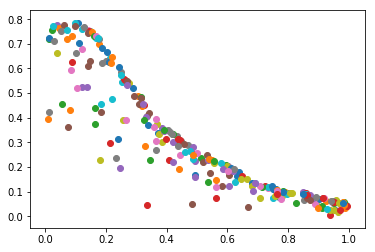

In [60]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['prunethresh'], scores['F-measure_no_offset'])
plt.show()

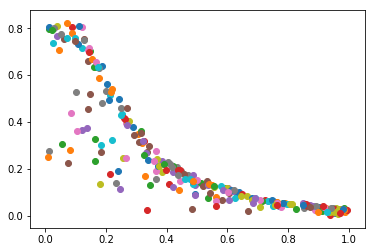

In [61]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['prunethresh'], scores['Recall_no_offset'])
plt.show()


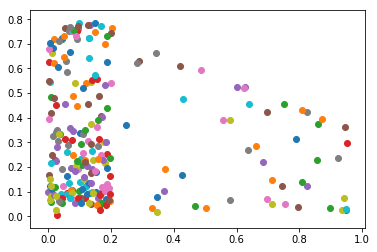

In [62]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['lowampsuppression'], scores['F-measure_no_offset'])
plt.show()


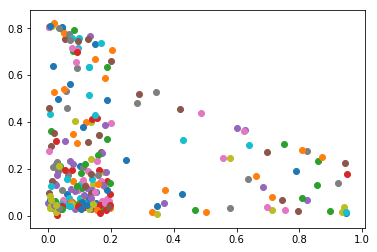

In [63]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['lowampsuppression'], scores['Recall_no_offset'])
plt.show()


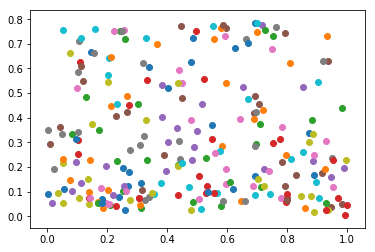

In [64]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['onsetsensitivity'], scores['F-measure_no_offset'])
plt.show()

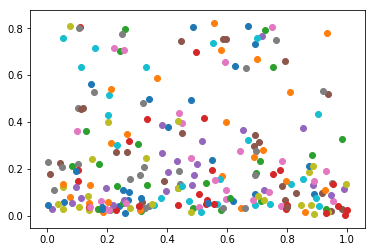

In [65]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['onsetsensitivity'], scores['Recall_no_offset'])
plt.show()